In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
from src.mask_pattern import LinePattern

In [3]:
from src import const
mask = LinePattern(cd=56, gap=80, direction="V", field_type="DF")(const.NDIVX, const.NDIVY)

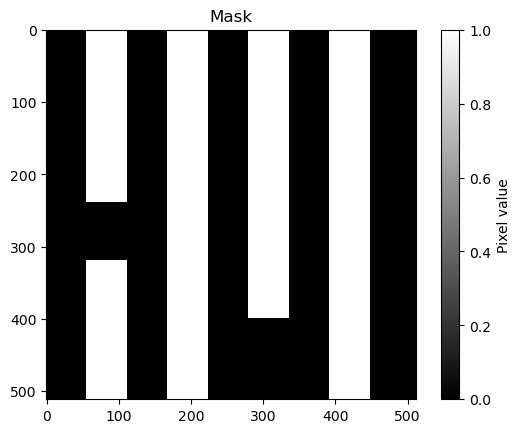

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [ ]:
import numpy as np
from src import fourier

ampta = 0.95 + 0.0j
ampvc = 1.0 + 0.0j
famp = fourier.mask(mask, ampta, ampvc)
rfamp = np.maximum(np.log(np.abs(famp)) + 10, 0)

AttributeError: module 'src.const' has no attribute 'ampta'

In [6]:

from src.intensity import intensity

intensity_map = intensity(mask)

<class 'numpy.ndarray'> (73, 73)
<class 'numpy.ndarray'> (73, 73)
<class 'numpy.ndarray'> (509,)


ValueError: operands could not be broadcast together with shapes (1,1,509) (1,1,1,18) 

In [31]:
from src import const

mask.shape, const.FDIVX

((2048, 2048), 2048)

In [36]:
import numpy as np
NDIVX, NDIVY = mask.shape

# マスクを高解像度に拡張
meshX = const.FDIVX // NDIVX
meshY = const.FDIVY // NDIVY
pattern = np.where(
    np.kron(mask, np.ones((meshX, meshY))), 0, 1
).astype(
    np.complex128
)